#Insurance Claims Charges Prediction

Download dataset

In [90]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-01-02 12:16:32--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  54.32K  --.-KB/s    in 0.02s   

2024-01-02 12:16:32 (3.53 MB/s) - ‘insurance.csv.2’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [91]:
#import basic libraries
import numpy as np #linear algebra
import pandas as pd #data processing, CSV fileI/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()


In [92]:
#Read the Data
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##STEP-2:Exploratory Data Analysis (EDA)

In [93]:
# Descriptive stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
# Null check
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulizations

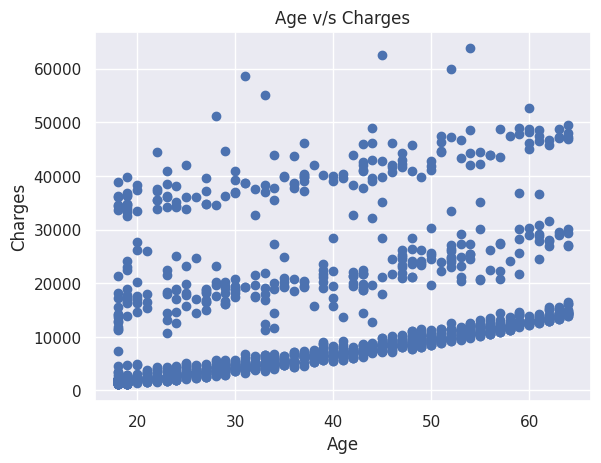

In [96]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.scatter(df.age,df.charges)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age v/s Charges")
plt.show()


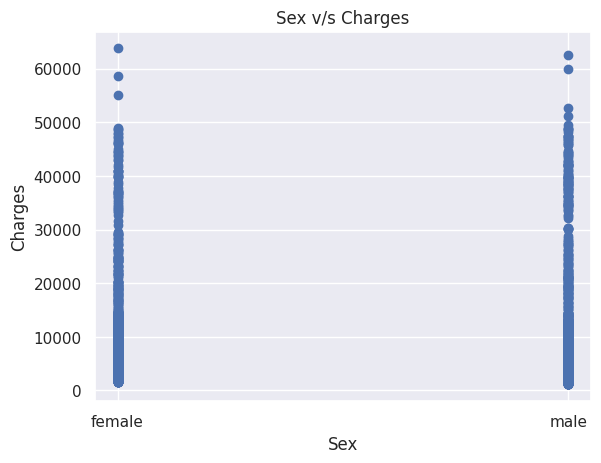

In [97]:
# sex vs charges
# males insurance charges more than females.
plt.scatter(df.sex,df.charges)
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Sex v/s Charges")
plt.show()


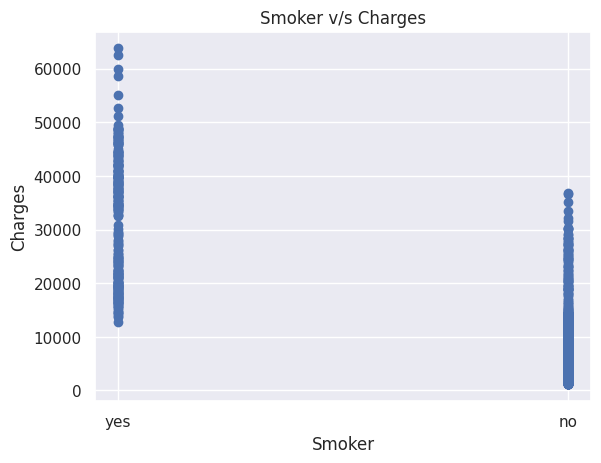

In [98]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
plt.scatter(df.smoker,df.charges)
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Smoker v/s Charges")
plt.show()


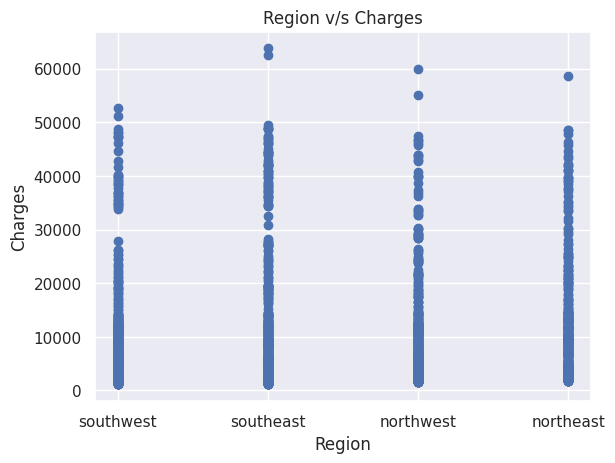

In [99]:
# region vs charges
# region actually does not play any role in determining the insurance charges
plt.scatter(df.region,df.charges)
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Region v/s Charges")
plt.show()


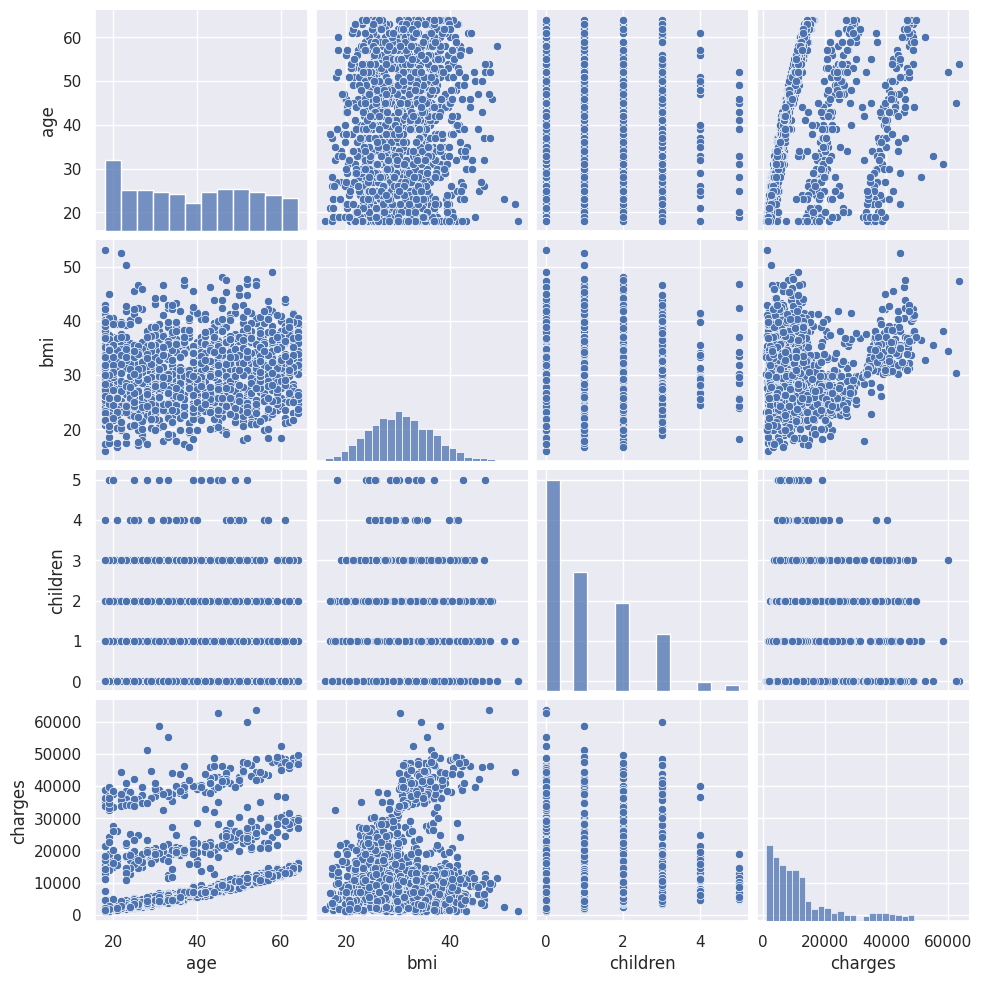

In [100]:
# plotting the correlation plot for the dataset
sns.pairplot(df)


##STEP-3:Data Preprocessing / Clean the Data


In [101]:
# removing unnecassary columns from the dataset
df.head()

print(df.shape)
df.columns

(1338, 7)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [102]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder

print("Unique values in sex column before encoding:",df['sex'].unique())
print("Unique values in smoker column before encoding:",df['smoker'].unique())

label_encoder=LabelEncoder()
df["sex1"]=label_encoder.fit_transform(df["sex"])
df["smoker1"]=label_encoder.fit_transform(df["smoker"])

print("Unique values in sex_encoded column after encoding:",df['sex1'].unique())
print("Unique values in smoker_encoded column after encoding:",df['smoker1'].unique())
print(df.head())


Unique values in sex column before encoding: ['female' 'male']
Unique values in smoker column before encoding: ['yes' 'no']
Unique values in sex_encoded column after encoding: [0 1]
Unique values in smoker_encoded column after encoding: [1 0]
   age     sex     bmi  children smoker     region      charges  sex1  smoker1
0   19  female  27.900         0    yes  southwest  16884.92400     0        1
1   18    male  33.770         1     no  southeast   1725.55230     1        0
2   28    male  33.000         3     no  southeast   4449.46200     1        0
3   33    male  22.705         0     no  northwest  21984.47061     1        0
4   32    male  28.880         0     no  northwest   3866.85520     1        0


In [103]:
df['sex'].value_counts()
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [104]:
#Selecting Independent (Features) & Dependent(Target) variables
X = df.drop(columns=['charges'])
X.head()

,age,sex,bmi,children,smoker,region,sex1,smoker1
0,19,female,27.900,0,yes,southwest,0,1
1,18,male,33.770,1,no,southeast,1,0
2,28,male,33.000,3,no,southeast,1,0
3,33,male,22.705,0,no,northwest,1,0
4,32,male,28.880,0,no,northwest,1,0


In [105]:
print(X.shape)
X.sample(5)

(1338, 8)


,age,sex,bmi,children,smoker,region,sex1,smoker1
37,26,male,20.800,0,no,southwest,1,0
818,47,female,26.125,1,yes,northeast,0,1
721,53,male,36.600,3,no,southwest,1,0
471,18,female,30.115,0,no,northeast,0,0
329,52,male,36.700,0,no,southwest,1,0


In [106]:
print(y.shape)
y.head(5)

(1338,)


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Splitting the dataset into the Training set and Test set

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [108]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


In [109]:
df.head(5)

print(df.shape)
df.columns

(1338, 9)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex1',
       'smoker1'],
      dtype='object')

##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df = pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [111]:
# creating the model
model=LinearRegression()
# feeding the training data to the model
model.fit(X_train,y_train)

# predicting the test set results
y_pred=model.predict(X_test)
# calculating the mean squared error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error(MSE):",mse)
# Calculating the root mean squared error
rmse=np.sqrt(mse)
print("Root Mean Squared Error(RMSE):",rmse)
# Calculating the r2 score
r2=r2_score(y_test,y_pred)
print('R-squared score(R2) :', r2)


Mean Squared Error(MSE): 33596915.85136145
Root Mean Squared Error(RMSE): 5796.284659276273
R-squared score(R2) : 0.7835929767120724


##Support Vector Machine

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df= pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# creating the model
model = SVR(kernel='linear')

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error(MSE): ', mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE): ', rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print('R-squared score(R2):', r2)

Mean Squared Error(MSE):  165994564.8489911
Root Mean Squared Error(RMSE):  12883.887800232937
R-squared score(R2): -0.06921688347442001


##Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df= pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# creating the model
model = DecisionTreeRegressor(random_state=42)

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error(MSE): ', MSE)

# Calculating the root mean squared error
RMSE = np.sqrt(MSE)
print('Root Mean Squared Error(RMSE): ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R-squared score(R2) :', R2)

Mean Squared Error(MSE):  42446908.010150984
Root Mean Squared Error(RMSE):  6515.129162967606
R-squared score(R2) : 0.7265877305258355


##Random Forest

In [114]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
df= pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# creating the model
#rfrmodel = RandomForestRegressor()
model = RandomForestRegressor(random_state=42)

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the mean squared error
MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error(MSE): ', MSE)

# Calculating the root mean squared error
RMSE = np.sqrt(MSE)
print('Root Mean Squared Error(RMSE): ', RMSE)

# Calculating the r2 score
R2 = r2_score(y_test, y_pred)
print('R-squared score(R2):', R2)

Mean Squared Error(MSE):  20942520.922619622
Root Mean Squared Error(RMSE):  4576.299916157115
R-squared score(R2): 0.8651034329144947


Compare and evaluate the Model results and find the best model

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [116]:
df= pd.read_csv('insurance.csv')
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']
features = pd.get_dummies(features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [117]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Machine', SVR(kernel='linear'))
]
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, rmse, r2])
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'R-squared'])
print("Model Comparison:")
print(results_df)
best_mse = results_df['MSE'].idxmin()
best_rmse = results_df['RMSE'].idxmin()
best_r2 = results_df['R-squared'].idxmax()
best_model = results_df.loc[[best_mse, best_rmse, best_r2]].iloc[0]
print("\nBest performing models based on metrics:")
print(best_model)

Model Comparison:
                    Model           MSE          RMSE  R-squared
0       Linear Regression  3.359692e+07   5796.284659   0.783593
1           Decision Tree  4.244691e+07   6515.129163   0.726588
2           Random Forest  2.094252e+07   4576.299916   0.865103
3  Support Vector Machine  1.659946e+08  12883.887800  -0.069217

Best performing models based on metrics:
Model         Random Forest
MSE          20942520.92262
RMSE            4576.299916
R-squared          0.865103
Name: 2, dtype: object
